In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intgr

In [ ]:
def equations(X, t, alpha, omega):    # calculate time derivatives
    theta, eta = X    # parse variables
    d_theta = eta

    # Omega_nt = g / l (pendulum length)
    omega_nt = 1 # Set to be 1
    d_eta = (omega_nt**2 - alpha * omega**2 * np.cos(omega*t)) * np.sin(theta)
    return [d_theta, d_eta]    # assemble derivatives into an array

In [ ]:
# Vertical Oscillation: z(t) = A * cos(omega * t)
# alpha = A / length

# Default Values
# alpha = 0.1    # amplitude of pivot << 1
# omega = 20.    # omega >> omega_nt
# theta0 = 0.1    # initial position
# eta0 = 0.0    # initial speed
# T = 10.    # total time to solve for
# time = np.arange(0, T, 0.01)    # time points to evaluate solution at
# sol = intgr.odeint(equations, [theta0, eta0], time, args=(alpha, omega))    # solve equations
# theta = sol[:,0]    # theta is the first component of solution

def init(alpha=0.1, omega=30, theta0=0.1, eta0=0.0, T=10, length=10):
  time = np.arange(0, T, 0.01)    # time points to evaluate solution at

  sol = intgr.odeint(equations, [theta0, eta0], time, args=(alpha, omega))    # solve equations
  theta = sol[:,0]    # theta is the first component of solution
  return alpha, omega, theta0, eta0, T, time, sol, theta, length


# Default
alpha, omega, theta0, eta0, T, time, sol, theta, length = init()

# Test Case
#alpha, omega, theta0, eta0, T, time, sol, theta, length = init(alpha = 1)

# Parameters: 30Hz, alpha = 1cm

# Omega_nt = g (const) / l (pendulum length)
# Set omega_nt = 1 --> l = g / 1 = 10 (Set to default)

# alpha = A / length 
A = alpha * length

# TODO: Plot 2D Position of Mass (and arc)
x = length * np.sin(theta)
y = length * np.cos(theta) + A * np.cos(omega*time)

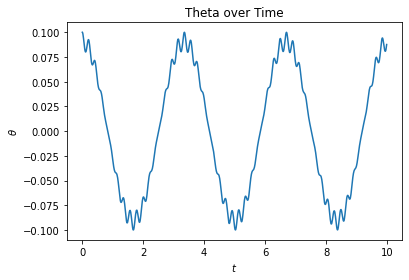

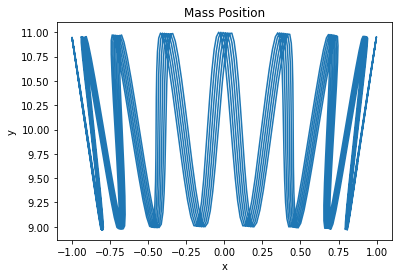

In [ ]:
plt.figure()
plt.title(r"Theta over Time")
plt.plot(time, theta)    # plot angle as a function of time
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.show()

plt.figure()
plt.title(r"Mass Position")
plt.plot(x, y)
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.show()

In [ ]:
for t in range(30): 
  print(np.cos(omega * time[t]))

1.0
0.955336489125606
0.8253356149096783
0.6216099682706645
0.3623577544766736
0.0707372016677029
-0.2272020946930869
-0.5048461045998576
-0.7373937155412454
-0.904072142017061
-0.9899924966004454
-0.9874797699088649
-0.8967584163341472
-0.7259323042001399
-0.4902608213406994
-0.2107957994307797
0.0874989834394464
0.37797774271298107
0.6346928759426339
0.8347127848391598
0.960170286650366
0.9998586363834151
0.9502325919585296
0.8157251001253568
0.6083513145322552
0.3466353178350258
0.05395542056264886
-0.24354415373579286
-0.5192886541166856
-0.7486466455973987


In [ ]:
import matplotlib.animation as anim

plt.rcParams["animation.html"] = "jshtml"
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.7, 1.5)
ax.axis('off')
p0, = ax.plot([], [], '-')
p1, = ax.plot([], [], 'o')

def animate(t):
    Zt = alpha * np.cos(omega * time[t])
    Xt = np.sin(theta[t])
    Yt = np.cos(theta[t]) + Zt
    p0.set_data([Xt, 0], [Yt, Zt])
    p1.set_data([Xt], [Yt])

mov = anim.FuncAnimation(fig, animate, frames=len(time), interval=10)
plt.close()

In [ ]:
mov